# Canonicar DS

## Imports

In [ ]:
%%capture
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Device Configuration

In [2]:
# scikit-learn regression don't use GPU, may be good for other stuff
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Data Collection & Preprocessing

In [ ]:
# file_pathy = "Extended_Lap_Data.csv"
# df = pd.read_csv(file_pathy)


In [ ]:
# df.head()

,average_speed,fuel_consumption,total_steering,total_throttle,total_brake,accel_x,accel_y,accel_z,ang_vel_x,ang_vel_y,ang_vel_z,latitude,longitude,altitude,velocity,lap time,vehicle_name,track_type
0,22.542943,0.122112,442.490063,95.765057,6.432723,-6.547775,20.322382,9.274060,0.068585,0.038409,0.892182,32.080147,34.780040,1.992749,1.513141,77.608764,vehicle.audi.a2,easy
1,22.910251,0.119391,425.138077,104.973049,6.825671,-0.001486,0.016748,10.449987,0.001470,0.001399,0.239490,32.080254,34.779947,2.038629,2.140390,78.296386,vehicle.citroen.c3,easy
2,22.948924,0.098013,540.045886,76.629806,5.702161,0.054540,-0.007307,9.329839,0.012908,0.000215,-0.000904,32.080286,34.779963,2.006428,1.149832,79.710762,vehicle.micro.microlino,easy
3,23.292335,0.117043,317.136144,107.774746,7.992851,4.427134,9.200725,9.840771,0.009263,0.000280,0.099016,32.080298,34.779992,1.969221,1.885082,75.803364,vehicle.dodge.charger_police,easy
4,23.545707,0.132455,324.638755,97.086055,6.987068,-6.353961,8.077399,9.771209,-0.002384,0.002950,0.731868,32.080255,34.780055,1.988673,2.242577,75.599768,vehicle.audi.tt,easy


In [ ]:
# vehicle_type_dict = {
#     "vehicle.yamaha.yzf": "Motorcycle",
#     "vehicle.carlamotors.carlacola": "Truck",
#     "vehicle.mini.cooper_s_2021": "Car",
#     "vehicle.mercedes.sprinter": "Van",
#     "vehicle.ford.ambulance": "Van",
#     "vehicle.kawasaki.ninja": "Motorcycle",
#     "vehicle.carlamotors.firetruck": "Truck",
#     "vehicle.ford.mustang": "Car",
#     "vehicle.volkswagen.t2_2021": "Van",
#     "vehicle.vespa.zx125": "Motorcycle",
#     "vehicle.lincoln.mkz_2020": "Car",
#     "vehicle.toyota.prius": "Car",
#     "vehicle.harley-davidson.low_rider": "Motorcycle",
#     "vehicle.audi.tt": "Car",
#     "vehicle.dodge.charger_2020": "Car",
#     "vehicle.nissan.patrol_2021": "Car",
#     "vehicle.tesla.cybertruck": "Truck",
# }


In [ ]:
# # remove any line with a vehicle_name not in the list

# df = df[df["vehicle_name"].isin(vehicle_type_dict.keys())]

# df.head()


,average_speed,fuel_consumption,total_steering,total_throttle,total_brake,accel_x,accel_y,accel_z,ang_vel_x,ang_vel_y,ang_vel_z,latitude,longitude,altitude,velocity,lap time,vehicle_name,track_type
4,23.545707,0.132455,324.638755,97.086055,6.987068,-6.353961,8.077399,9.771209,-0.002384,0.002950,0.731868,32.080255,34.780055,1.988673,2.242577,75.599768,vehicle.audi.tt,easy
16,13.814251,0.005381,171.889330,37.552754,5.756017,-2.504076,4.840102,9.759463,0.004164,0.001745,0.354031,41.999401,2.000945,1.988808,3.532316,43.230682,vehicle.audi.tt,easy
20,13.826086,0.001621,188.974015,38.833041,1.225023,0.524179,0.059079,9.596846,0.019099,-0.007923,0.284341,41.999252,2.000770,1.966493,4.265146,45.067932,vehicle.harley-davidson.low_rider,easy
21,13.841473,0.007125,172.717915,42.547029,4.402779,-0.371271,-0.484408,9.871880,-0.011801,0.000157,0.103812,41.999324,2.000883,2.000430,4.628959,43.225411,vehicle.dodge.charger_2020,easy
22,14.176885,0.007569,214.845518,47.263151,0.330608,3.721761,13.703325,9.639760,0.040095,0.003298,0.458207,41.999249,2.000432,1.995100,4.556846,45.721086,vehicle.ford.ambulance,easy


In [ ]:
# # add vehicle type to the dataframe by vehicle name

# df["vehicle_type"] = df["vehicle_name"].map(vehicle_type_dict)

In [ ]:
# # Load JSON data
# json_file_path = "cars_modified.json"
# with open(json_file_path, "r") as json_file:
#     json_data = json.load(json_file)

# # Extract relevant data for each vehicle
# vehicle_data = {}
# for vehicle_name, vehicle_info in json_data.items():
#     vehicle_data[vehicle_name] = {
#         "mass": vehicle_info.get("mass"),
#         "drag_coefficient": vehicle_info.get("drag_coefficient"),
#         "center_of_mass_x": vehicle_info.get("center_of_mass_x"),
#         "center_of_mass_y": vehicle_info.get("center_of_mass_y"),
#         "center_of_mass_z": vehicle_info.get("center_of_mass_z"),
#         "max_rpm": vehicle_info.get("max_rpm"),
#         "moi": vehicle_info.get("moi"),
#         "clutch_strength": vehicle_info.get("clutch_strength"),
#         "gear_switch_time": vehicle_info.get("gear_switch_time"),
#         "front_left_wheel_tire_friction": vehicle_info.get("front_left_wheel_tire_friction"),
#         "front_left_wheel_damping_rate": vehicle_info.get("front_left_wheel_damping_rate"),
#         "front_left_wheel_max_steer_angle": vehicle_info.get("front_left_wheel_max_steer_angle"),
#         "front_left_wheel_radius": vehicle_info.get("front_left_wheel_radius"),
#         "front_left_wheel_max_brake_torque": vehicle_info.get("front_left_wheel_max_brake_torque"),
#         "front_left_wheel_max_handbrake_torque": vehicle_info.get("front_left_wheel_max_handbrake_torque"),
#         "front_left_wheel_lat_stiff_max_load": vehicle_info.get("front_left_wheel_lat_stiff_max_load"),
#         "front_left_wheel_lat_stiff_value": vehicle_info.get("front_left_wheel_lat_stiff_value"),
#         "front_left_wheel_long_stiff_value": vehicle_info.get("front_left_wheel_long_stiff_value"),
#         "front_left_wheel_position_x": vehicle_info.get("front_left_wheel_position_x"),
#         "front_left_wheel_position_y": vehicle_info.get("front_left_wheel_position_y"),
#         "front_left_wheel_position_z": vehicle_info.get("front_left_wheel_position_z"),
#         "front_right_wheel_tire_friction": vehicle_info.get("front_right_wheel_tire_friction"),
#         "front_right_wheel_damping_rate": vehicle_info.get("front_right_wheel_damping_rate"),
#         "front_right_wheel_max_steer_angle": vehicle_info.get("front_right_wheel_max_steer_angle"),
#         "front_right_wheel_radius": vehicle_info.get("front_right_wheel_radius"),
#         "front_right_wheel_max_brake_torque": vehicle_info.get("front_right_wheel_max_brake_torque"),
#         "front_right_wheel_max_handbrake_torque": vehicle_info.get("front_right_wheel_max_handbrake_torque"),
#         "front_right_wheel_lat_stiff_max_load": vehicle_info.get("front_right_wheel_lat_stiff_max_load"),
#         "front_right_wheel_lat_stiff_value": vehicle_info.get("front_right_wheel_lat_stiff_value"),
#         "front_right_wheel_long_stiff_value": vehicle_info.get("front_right_wheel_long_stiff_value"),
#         "front_right_wheel_position_x": vehicle_info.get("front_right_wheel_position_x"),
#         "front_right_wheel_position_y": vehicle_info.get("front_right_wheel_position_y"),
#         "front_right_wheel_position_z": vehicle_info.get("front_right_wheel_position_z"),
#         "rear_left_wheel_tire_friction": vehicle_info.get("rear_left_wheel_tire_friction"),
#         "rear_left_wheel_damping_rate": vehicle_info.get("rear_left_wheel_damping_rate"),
#         "rear_left_wheel_max_steer_angle": vehicle_info.get("rear_left_wheel_max_steer_angle"),
#         "rear_left_wheel_radius": vehicle_info.get("rear_left_wheel_radius"),
#         "rear_left_wheel_max_brake_torque": vehicle_info.get("rear_left_wheel_max_brake_torque"),
#         "rear_left_wheel_max_handbrake_torque": vehicle_info.get("rear_left_wheel_max_handbrake_torque"),
#         "rear_left_wheel_lat_stiff_max_load": vehicle_info.get("rear_left_wheel_lat_stiff_max_load"),
#         "rear_left_wheel_lat_stiff_value": vehicle_info.get("rear_left_wheel_lat_stiff_value"),
#         "rear_left_wheel_long_stiff_value": vehicle_info.get("rear_left_wheel_long_stiff_value"),
#         "rear_left_wheel_position_x": vehicle_info.get("rear_left_wheel_position_x"),
#         "rear_left_wheel_position_y": vehicle_info.get("rear_left_wheel_position_y"),
#         "rear_left_wheel_position_z": vehicle_info.get("rear_left_wheel_position_z"),
#         "rear_right_wheel_tire_friction": vehicle_info.get("rear_right_wheel_tire_friction"),
#         "rear_right_wheel_damping_rate": vehicle_info.get("rear_right_wheel_damping_rate"),
#         "rear_right_wheel_max_steer_angle": vehicle_info.get("rear_right_wheel_max_steer_angle"),
#         "rear_right_wheel_radius": vehicle_info.get("rear_right_wheel_radius"),
#         "rear_right_wheel_max_brake_torque": vehicle_info.get("rear_right_wheel_max_brake_torque"),
#         "rear_right_wheel_max_handbrake_torque": vehicle_info.get("rear_right_wheel_max_handbrake_torque"),
#         "rear_right_wheel_lat_stiff_max_load": vehicle_info.get("rear_right_wheel_lat_stiff_max_load"),
#         "rear_right_wheel_lat_stiff_value": vehicle_info.get("rear_right_wheel_lat_stiff_value"),
#         "rear_right_wheel_long_stiff_value": vehicle_info.get("rear_right_wheel_long_stiff_value"),
#         "rear_right_wheel_position_x": vehicle_info.get("rear_right_wheel_position_x"),
#         "rear_right_wheel_position_y": vehicle_info.get("rear_right_wheel_position_y"),
#         "rear_right_wheel_position_z": vehicle_info.get("rear_right_wheel_position_z")
#     }

# # Create a DataFrame from the vehicle data
# vehicle_df = pd.DataFrame.from_dict(vehicle_data, orient="index")

# # Merge the vehicle data with the CSV data
# df = df.merge(vehicle_df, left_on="vehicle_name", right_index=True, how="left")

# # Save the updated DataFrame to a new CSV file
# df.to_csv("Extended_Lap_Data_Updated.csv", index=False)

# print("Data merged and saved to Extended_Lap_Data_Updated.csv")

Data merged and saved to Extended_Lap_Data_Updated.csv


In [ ]:
# df_updated = pd.read_csv("Extended_Lap_Data_Updated.csv")

In [ ]:
# df_updated.head()

,vehicle_name,vehicle_type,track_type,average_speed,fuel_consumption,total_steering,total_throttle,total_brake,accel_x,accel_y,...,rear_left_wheel_position_z,rear_right_wheel_radius,rear_right_wheel_max_brake_torque,rear_right_wheel_max_handbrake_torque,rear_right_wheel_lat_stiff_max_load,rear_right_wheel_lat_stiff_value,rear_right_wheel_long_stiff_value,rear_right_wheel_position_x,rear_right_wheel_position_y,rear_right_wheel_position_z
0,vehicle.audi.tt,Car,easy,23.545707,0.132455,324.638755,97.086055,6.987068,-6.353961,8.077399,...,87.377563,34.0,700,1400,3,20,3000,9838.762695,4073.746094,87.377563
1,vehicle.audi.tt,Car,easy,13.814251,0.005381,171.889330,37.552754,5.756017,-2.504076,4.840102,...,87.377563,34.0,700,1400,3,20,3000,9838.762695,4073.746094,87.377563
2,vehicle.harley-davidson.low_rider,Motorcycle,easy,13.826086,0.001621,188.974015,38.833041,1.225023,0.524179,0.059079,...,84.417114,35.5,1500,3000,2,17,1000,10970.796880,-611.760986,84.417114
3,vehicle.dodge.charger_2020,Car,easy,13.841473,0.007125,172.717915,42.547029,4.402779,-0.371271,-0.484408,...,86.128242,35.0,1000,2000,3,20,3000,3145.575928,13312.832030,86.128242
4,vehicle.ford.ambulance,Van,easy,14.176885,0.007569,214.845518,47.263151,0.330608,3.721761,13.703325,...,79.684296,35.0,800,1600,2,17,1000,-1845.221069,1593.346680,79.684296


In [ ]:
# # each column that only contains zero or one value is removed

# df_updated = df_updated.loc[:, df_updated.nunique() != 1]

In [ ]:
# # Save the updated DataFrame to a new CSV file
# df_updated.to_csv("Extended_Lap_Data_Updated_unique.csv", index=False)
# df_updated.head()

,vehicle_name,vehicle_type,track_type,average_speed,fuel_consumption,total_steering,total_throttle,total_brake,accel_x,accel_y,...,rear_left_wheel_position_z,rear_right_wheel_radius,rear_right_wheel_max_brake_torque,rear_right_wheel_max_handbrake_torque,rear_right_wheel_lat_stiff_max_load,rear_right_wheel_lat_stiff_value,rear_right_wheel_long_stiff_value,rear_right_wheel_position_x,rear_right_wheel_position_y,rear_right_wheel_position_z
0,vehicle.audi.tt,Car,easy,23.545707,0.132455,324.638755,97.086055,6.987068,-6.353961,8.077399,...,87.377563,34.0,700,1400,3,20,3000,9838.762695,4073.746094,87.377563
1,vehicle.audi.tt,Car,easy,13.814251,0.005381,171.889330,37.552754,5.756017,-2.504076,4.840102,...,87.377563,34.0,700,1400,3,20,3000,9838.762695,4073.746094,87.377563
2,vehicle.harley-davidson.low_rider,Motorcycle,easy,13.826086,0.001621,188.974015,38.833041,1.225023,0.524179,0.059079,...,84.417114,35.5,1500,3000,2,17,1000,10970.796880,-611.760986,84.417114
3,vehicle.dodge.charger_2020,Car,easy,13.841473,0.007125,172.717915,42.547029,4.402779,-0.371271,-0.484408,...,86.128242,35.0,1000,2000,3,20,3000,3145.575928,13312.832030,86.128242
4,vehicle.ford.ambulance,Van,easy,14.176885,0.007569,214.845518,47.263151,0.330608,3.721761,13.703325,...,79.684296,35.0,800,1600,2,17,1000,-1845.221069,1593.346680,79.684296


In [37]:
df = pd.read_csv("Extended_Lap_Data_Updated_unique.csv")

In [38]:
df.head()

,vehicle_name,vehicle_type,track_type,average_speed,fuel_consumption,total_steering,total_throttle,total_brake,accel_x,accel_y,...,rear_left_wheel_position_z,rear_right_wheel_radius,rear_right_wheel_max_brake_torque,rear_right_wheel_max_handbrake_torque,rear_right_wheel_lat_stiff_max_load,rear_right_wheel_lat_stiff_value,rear_right_wheel_long_stiff_value,rear_right_wheel_position_x,rear_right_wheel_position_y,rear_right_wheel_position_z
0,vehicle.audi.tt,Car,easy,23.545707,0.132455,324.638755,97.086055,6.987068,-6.353961,8.077399,...,87.377563,34.0,700,1400,3,20,3000,9838.762695,4073.746094,87.377563
1,vehicle.audi.tt,Car,easy,13.814251,0.005381,171.889330,37.552754,5.756017,-2.504076,4.840102,...,87.377563,34.0,700,1400,3,20,3000,9838.762695,4073.746094,87.377563
2,vehicle.harley-davidson.low_rider,Motorcycle,easy,13.826086,0.001621,188.974015,38.833041,1.225023,0.524179,0.059079,...,84.417114,35.5,1500,3000,2,17,1000,10970.796880,-611.760986,84.417114
3,vehicle.dodge.charger_2020,Car,easy,13.841473,0.007125,172.717915,42.547029,4.402779,-0.371271,-0.484408,...,86.128242,35.0,1000,2000,3,20,3000,3145.575928,13312.832030,86.128242
4,vehicle.ford.ambulance,Van,easy,14.176885,0.007569,214.845518,47.263151,0.330608,3.721761,13.703325,...,79.684296,35.0,800,1600,2,17,1000,-1845.221069,1593.346680,79.684296


In [ ]:
# Convert float64 to float32
float_cols = df_updated.select_dtypes(include=["float64"]).columns
df_updated[float_cols] = df_updated[float_cols].astype("float32")

# Convert int64 to int32
int_cols = df_updated.select_dtypes(include=["int64"]).columns
df_updated[int_cols] = df_updated[int_cols].astype("int32")

In [26]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 76 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   average_speed                           862 non-null    float64
 1   fuel_consumption                        862 non-null    float64
 2   total_steering                          862 non-null    float64
 3   total_throttle                          862 non-null    float64
 4   total_brake                             862 non-null    float64
 5   accel_x                                 862 non-null    float64
 6   accel_y                                 862 non-null    float64
 7   accel_z                                 862 non-null    float64
 8   ang_vel_x                               862 non-null    float64
 9   ang_vel_y                               862 non-null    float64
 10  ang_vel_z                               862 non-null    float6

In [ ]:
selected_features = [
    "average_speed", "fuel_consumption", "total_steering",
    "total_throttle", "total_brake", "accel_x", "accel_y", "accel_z",
    "ang_vel_x", "ang_vel_y", "ang_vel_z", "latitude", "longitude",
    "altitude", "velocity"
]

df_clean = df_updated.dropna(subset=selected_features + ["lap time"])

In [83]:
X = df_clean[selected_features]
y = df_clean["lap time"]

print(f"Feature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")

Feature Matrix Shape: (269, 15)
Target Vector Shape: (269,)


#### Train-test split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# Normalize input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 188 samples
Testing set size: 81 samples


### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

#### Fit models and compute MSE, RMSE, R² scores

#### Visualize plots

#### Feature importance ranking

### Gaussian Process

In [26]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

The model uses a Radial Basis Function (RBF) kernel, which allows it to capture nonlinear relationships.

The ConstantKernel defines the scale of variation.

#### Fit models and compute MSE, RMSE, R² scores

In [27]:
subset_size = 2000
X_train_gpr = X_train_scaled[:subset_size]
y_train_gpr = y_train[:subset_size]

y_scaler = StandardScaler()
y_train_gpr_scaled = y_scaler.fit_transform(y_train_gpr.values.reshape(-1, 1)).ravel()

In [28]:
kernel = DotProduct() + WhiteKernel()

gpr = GaussianProcessRegressor(kernel=kernel, random_state=42, n_restarts_optimizer=5)

In [29]:
gpr.fit(X_train_gpr, y_train_gpr_scaled)

GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=5, random_state=42)

In [30]:
# Predict & inverse-transform predictions
y_pred_gpr_scaled, std_dev = gpr.predict(X_test_scaled, return_std=True)
y_pred_gpr = y_scaler.inverse_transform(y_pred_gpr_scaled.reshape(-1, 1)).ravel()

In [31]:
mse_gpr = mean_squared_error(y_test, y_pred_gpr)
r2_gpr = r2_score(y_test, y_pred_gpr)

In [32]:
print(f"Gaussian Process Regression Results:\nMSE: {mse_gpr:.2f}, R² Score: {r2_gpr:.2f}")

Gaussian Process Regression Results:
MSE: 2.08, R² Score: -0.01


#### Visualize plots

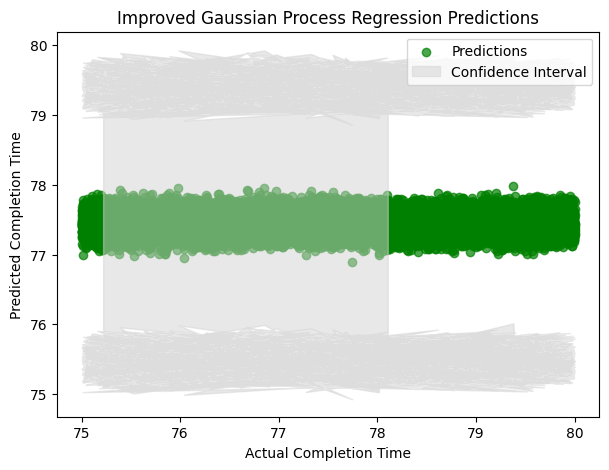

In [33]:
# Plot actual vs predicted values with uncertainty
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_gpr, alpha=0.7, color="green", label="Predictions")
plt.fill_between(y_test, y_pred_gpr - 1.96 * std_dev, y_pred_gpr + 1.96 * std_dev, 
                 color="lightgray", alpha=0.5, label="Confidence Interval")
plt.xlabel("Actual Completion Time")
plt.ylabel("Predicted Completion Time")
plt.title("Improved Gaussian Process Regression Predictions")
plt.legend()
plt.show()


#### Feature importance ranking

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

#### Fit models and compute MSE, RMSE, R² scores

In [35]:
dt_regressor = DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)
dt_regressor.fit(X_train_scaled, y_train)
dt_y_pred = dt_regressor.predict(X_test_scaled)

In [36]:
mse_dt = mean_squared_error(y_test, dt_y_pred)
r2_dt = r2_score(y_test, dt_y_pred)

print(f"Decision Tree Regression Results:\nMSE: {mse_dt:.2f}, R² Score: {r2_dt:.2f}")

Decision Tree Regression Results:
MSE: 2.13, R² Score: -0.03


#### Visualize plots

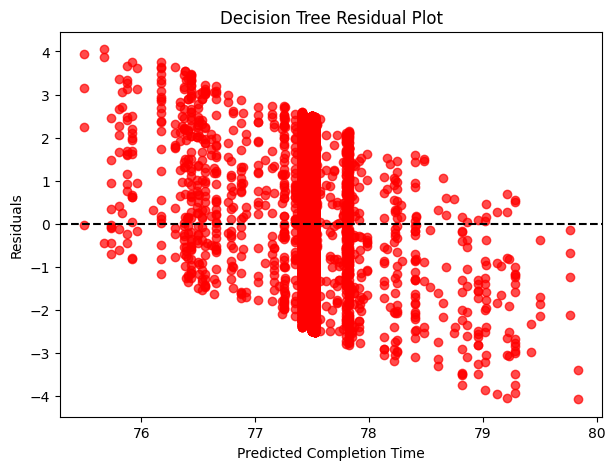

In [37]:
residuals = y_test - dt_y_pred

plt.figure(figsize=(7,5))
plt.scatter(dt_y_pred, residuals, alpha=0.7, color="red")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Completion Time")
plt.ylabel("Residuals")
plt.title("Decision Tree Residual Plot")
plt.show()

#### Feature importance ranking

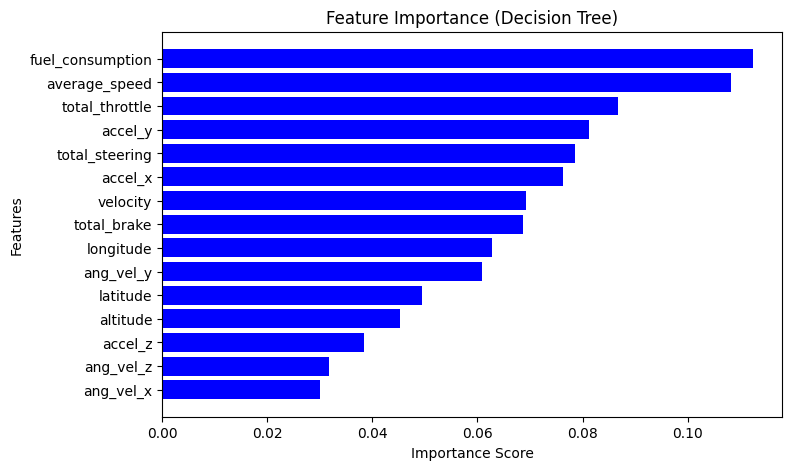

In [38]:
# Get feature importance scores
feature_importance = dt_regressor.feature_importances_

importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="blue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Decision Tree)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


### Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

#### Fit models and compute MSE, RMSE, R² scores

In [40]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split=10, random_state=42, n_jobs=-1)
rf_regressor.fit(X_train_scaled, y_train)
y_pred_rf = rf_regressor.predict(X_test_scaled)

In [41]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression Results:\nMSE: {mse_rf:.2f}, R² Score: {r2_rf:.2f}")

Random Forest Regression Results:
MSE: 2.07, R² Score: -0.00


#### Visualize plots

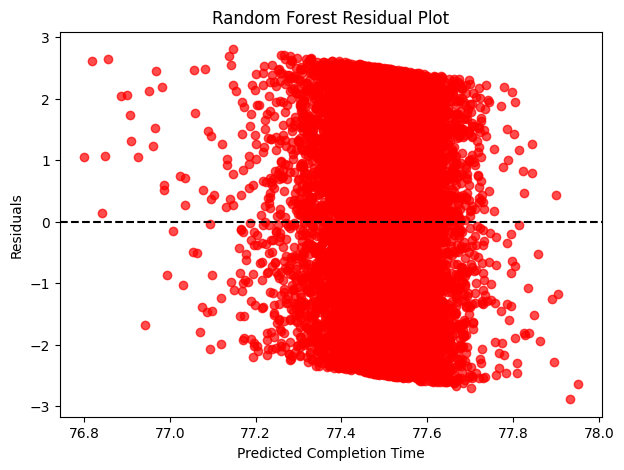

In [42]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(7,5))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.7, color="red")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Completion Time")
plt.ylabel("Residuals")
plt.title("Random Forest Residual Plot")
plt.show()


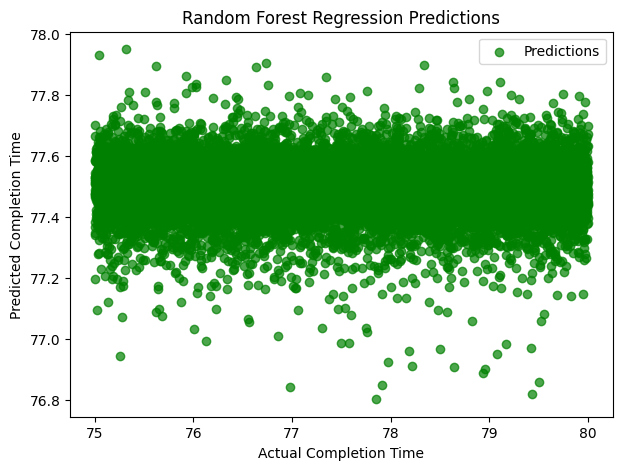

In [43]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color="green", label="Predictions")
plt.xlabel("Actual Completion Time")
plt.ylabel("Predicted Completion Time")
plt.title("Random Forest Regression Predictions")
plt.legend()
plt.show()

#### Feature importance ranking

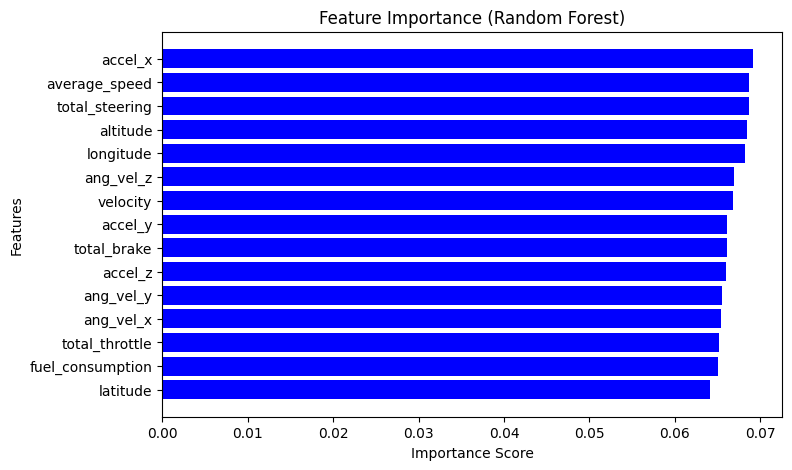

In [44]:
feature_importance_rf = rf_regressor.feature_importances_

importance_df_rf = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance_rf})
importance_df_rf = importance_df_rf.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(importance_df_rf["Feature"], importance_df_rf["Importance"], color="blue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


### Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

#### Fit models and compute MSE, RMSE, R² scores

In [46]:
gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, min_samples_split=10, random_state=42)
gb_regressor.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=10, n_estimators=200,
                          random_state=42)

In [47]:
y_pred_gb = gb_regressor.predict(X_test_scaled)

In [48]:
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression Results:\nMSE: {mse_gb:.2f}, R² Score: {r2_gb:.2f}")

Gradient Boosting Regression Results:
MSE: 2.10, R² Score: -0.02


#### Visualize plots

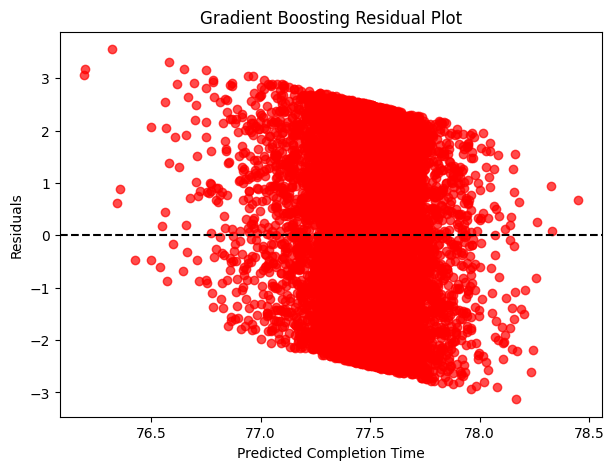

In [49]:
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(7,5))
plt.scatter(y_pred_gb, residuals_gb, alpha=0.7, color="red")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Completion Time")
plt.ylabel("Residuals")
plt.title("Gradient Boosting Residual Plot")
plt.show()

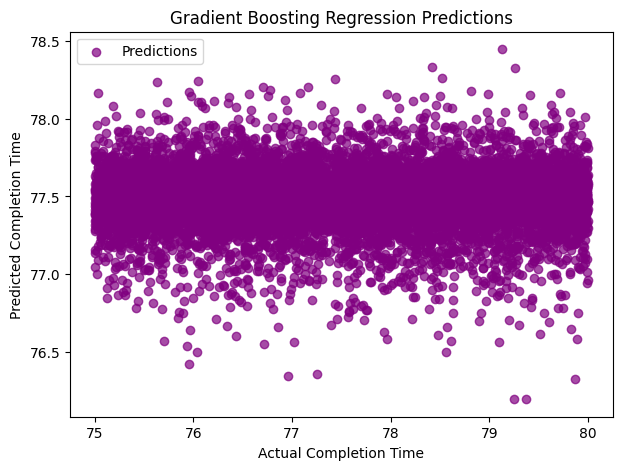

In [50]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_gb, alpha=0.7, color="purple", label="Predictions")
plt.xlabel("Actual Completion Time")
plt.ylabel("Predicted Completion Time")
plt.title("Gradient Boosting Regression Predictions")
plt.legend()
plt.show()


#### Feature importance ranking

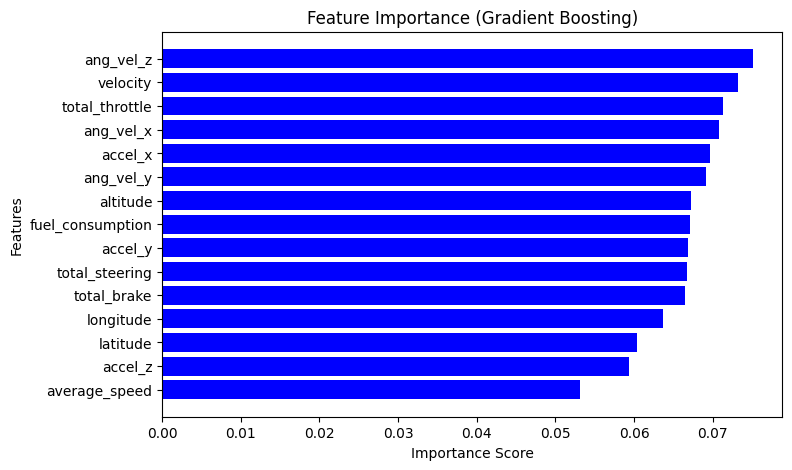

In [51]:
feature_importance_gb = gb_regressor.feature_importances_

importance_df_gb = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance_gb})
importance_df_gb = importance_df_gb.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,5))
plt.barh(importance_df_gb["Feature"], importance_df_gb["Importance"], color="blue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Gradient Boosting)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

### Support Vector

In [52]:
from sklearn.svm import SVR

#### Fit models and compute MSE, RMSE, R² scores

In [53]:
svr_regressor = SVR(kernel="rbf", C=1.0, epsilon=0.1)
# Train the model (Can be slow on large datasets)
svr_regressor.fit(X_train_scaled, y_train)
y_pred_svr = svr_regressor.predict(X_test_scaled)

In [54]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression Results:\nMSE: {mse_svr:.2f}, R² Score: {r2_svr:.2f}")

Support Vector Regression Results:
MSE: 2.19, R² Score: -0.06


#### Visualize plots

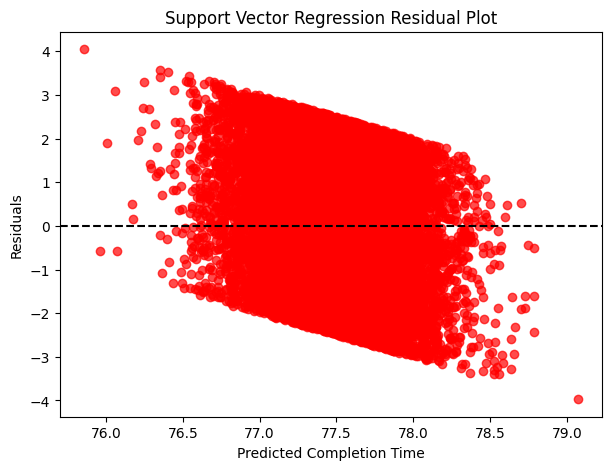

In [55]:
residuals_svr = y_test - y_pred_svr

plt.figure(figsize=(7,5))
plt.scatter(y_pred_svr, residuals_svr, alpha=0.7, color="red")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Completion Time")
plt.ylabel("Residuals")
plt.title("Support Vector Regression Residual Plot")
plt.show()


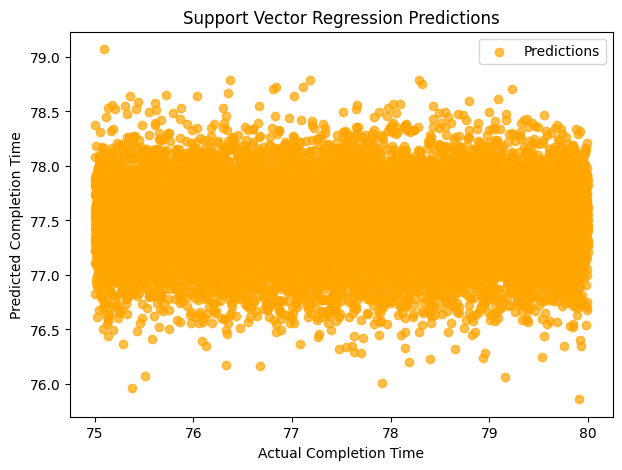

In [56]:
# Plot actual vs. predicted values
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_svr, alpha=0.7, color="orange", label="Predictions")
plt.xlabel("Actual Completion Time")
plt.ylabel("Predicted Completion Time")
plt.title("Support Vector Regression Predictions")
plt.legend()
plt.show()


##  Neural Networks for Regression

### Completion Time Prediction
- MLP
- **Activation**: ReLU, Tanh.
- **Loss Function**: MSE.

In [57]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)
device

'cuda'

#### Network

In [70]:
import torch.nn as nn

class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 32)
        self.fc7 = nn.Linear(32, 16)
        self.fc8 = nn.Linear(16, 8)
        self.fc9 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.batch_norm1 = nn.BatchNorm1d(1024)
        self.batch_norm2 = nn.BatchNorm1d(512)
        self.batch_norm3 = nn.BatchNorm1d(256)
        self.batch_norm4 = nn.BatchNorm1d(128)
        self.batch_norm5 = nn.BatchNorm1d(64)
        self.batch_norm6 = nn.BatchNorm1d(32)
        self.batch_norm7 = nn.BatchNorm1d(16)

    def forward(self, x):
        x = self.relu(self.batch_norm1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.batch_norm2(self.fc2(x)))
        x = self.relu(self.batch_norm3(self.fc3(x)))
        x = self.relu(self.batch_norm4(self.fc4(x)))
        x = self.relu(self.batch_norm5(self.fc5(x)))
        x = self.relu(self.batch_norm6(self.fc6(x)))
        x = self.relu(self.batch_norm7(self.fc7(x)))
        x = self.fc8(x)
        x = self.fc9(x)  # No activation for regression
        return x

# Initialize model
input_dim = X_train_tensor.shape[1]
model = RegressionNN(input_dim).to(device)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print(model)

RegressionNN(
  (fc1): Linear(in_features=15, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=32, bias=True)
  (fc7): Linear(in_features=32, out_features=16, bias=True)
  (fc8): Linear(in_features=16, out_features=8, bias=True)
  (fc9): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (batch_norm1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_runnin

#### Train

Epoch 10/500, Loss: 1.6481, R² Score: 0.3549
Epoch 20/500, Loss: 1.6610, R² Score: 0.3570
Epoch 30/500, Loss: 1.6174, R² Score: 0.3540
Epoch 40/500, Loss: 1.6392, R² Score: 0.3668
Epoch 50/500, Loss: 1.6186, R² Score: 0.3470
Epoch 60/500, Loss: 1.5986, R² Score: 0.3648
Epoch 70/500, Loss: 1.6247, R² Score: 0.3696
Epoch 80/500, Loss: 1.6436, R² Score: 0.3716
Epoch 90/500, Loss: 1.6226, R² Score: 0.3623
Epoch 100/500, Loss: 1.6049, R² Score: 0.3708
Epoch 110/500, Loss: 1.6035, R² Score: 0.3647
Epoch 120/500, Loss: 1.6047, R² Score: 0.3853
Epoch 130/500, Loss: 1.5933, R² Score: 0.3846
Epoch 140/500, Loss: 1.5860, R² Score: 0.3841
Epoch 150/500, Loss: 1.5832, R² Score: 0.3910
Epoch 160/500, Loss: 1.5785, R² Score: 0.3922
Epoch 170/500, Loss: 1.5905, R² Score: 0.3816
Epoch 180/500, Loss: 1.5605, R² Score: 0.4022
Epoch 190/500, Loss: 1.5520, R² Score: 0.3944
Epoch 200/500, Loss: 1.5540, R² Score: 0.4136
Epoch 210/500, Loss: 1.5831, R² Score: 0.4062
Epoch 220/500, Loss: 1.5541, R² Score: 0.38

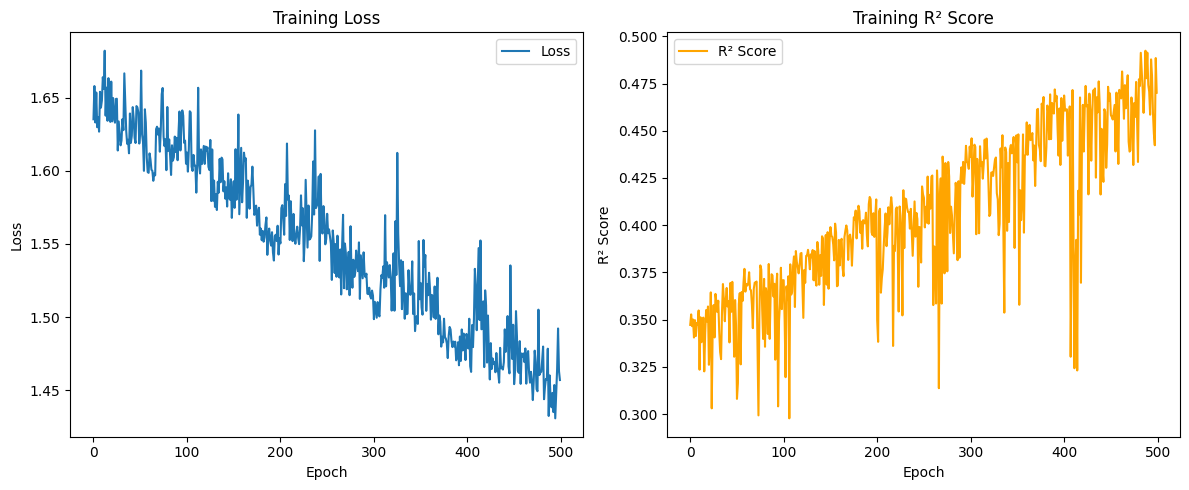

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Training Loop
epochs = 500
losses = []
r2_scores = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    
    # Backward pass
    loss.backward()
    optimizer.step()

    # Store loss and R² score
    losses.append(loss.item())
    model.eval()
    with torch.no_grad():
        train_predictions = model(X_train_tensor)
        train_r2 = r2_score(y_train_tensor.cpu().numpy(), train_predictions.cpu().numpy())
        r2_scores.append(train_r2)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, R² Score: {train_r2:.4f}")

    if (epoch + 1) % 500 == 0:
        print(f"Epoch {epoch+1}/{epochs}, R² Score: {train_r2:.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)
    test_r2 = r2_score(y_test_tensor.cpu().numpy(), test_predictions.cpu().numpy())

print(f"Test Loss: {test_loss.item():.4f}, Test R² Score: {test_r2:.4f}")

# Plotting Loss and R² Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(r2_scores, label='R² Score', color='orange')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.title('Training R² Score')
plt.legend()

plt.tight_layout()
plt.show()

#### Test & Evaluate

In [75]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor).cpu().numpy()
    y_pred_test = model(X_test_tensor).cpu().numpy()

# Compute metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R²: {test_r2:.4f}")


Train MSE: 1.1021
Test MSE: 2.5917
Test R²: -0.2565


### Stability Prediction
  - Combination of speed, acceleration, and tire pressure as inputs.
  - Embedding layer for vehicle type (categorical feature).

#### Network

#### Train

#### Test & Evaluate

## Classification - PySpark

### Decision Tree

#### Train

#### Test & Evaluate
 - **Accuracy, Precision, Recall, F1-score**.

#### Plots
 - **Confusion Matrix & ROC Curves**.

### Naive Bayes

#### Train

#### Test & Evaluate
 - **Accuracy, Precision, Recall, F1-score**.

#### Plots
 - **Confusion Matrix & ROC Curves**.

### XGBoost

#### Train

#### Test & Evaluate
 - **Accuracy, Precision, Recall, F1-score**.

#### Plots
 - **Confusion Matrix & ROC Curves**.

### Random Forest

#### Train

#### Test & Evaluate
 - **Accuracy, Precision, Recall, F1-score**.

#### Plots
 - **Confusion Matrix & ROC Curves**.

## Clustering - PySpark
- Grouping Similar Driving Behaviors

### Evaluation & Visualization

#### Silhouette Score
- To measure clustering quality

#### PCA / t-SNE Plots
- Visualize clusters in 2D/3D